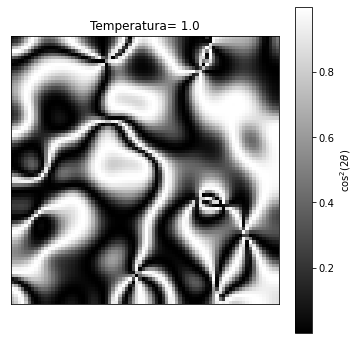

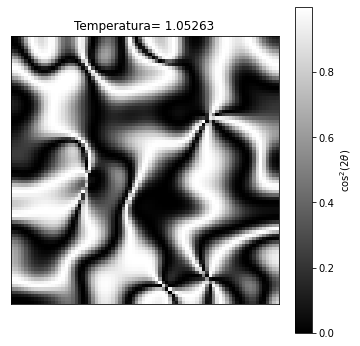

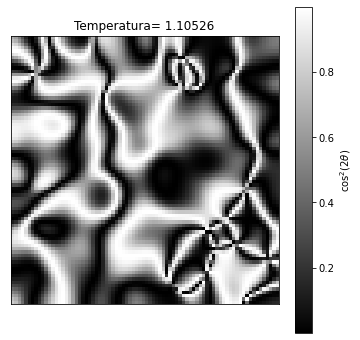

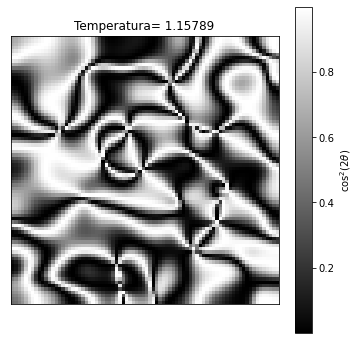

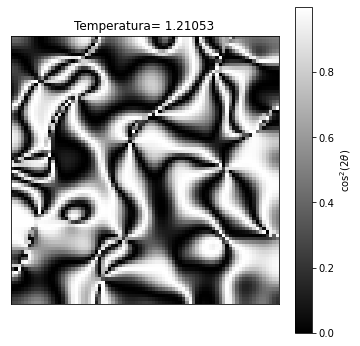

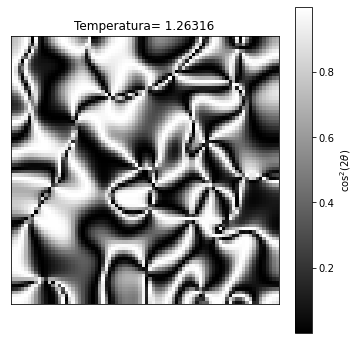

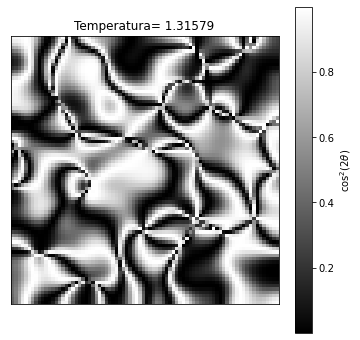

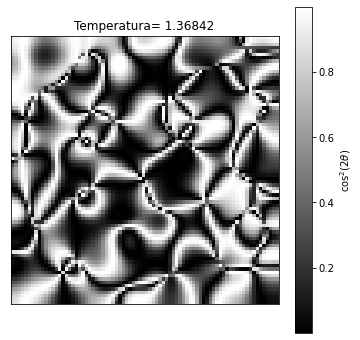

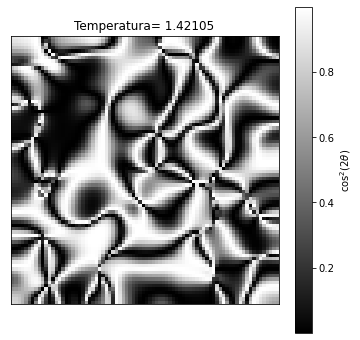

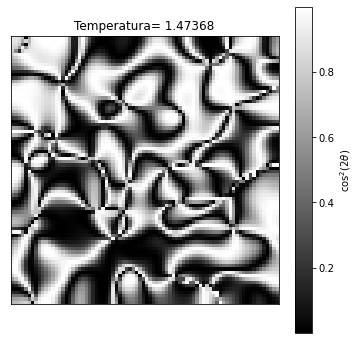

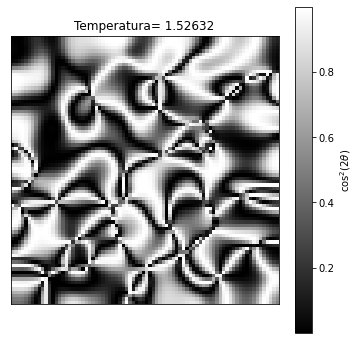

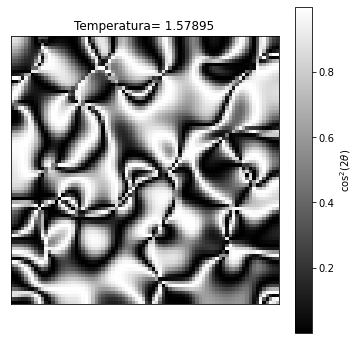

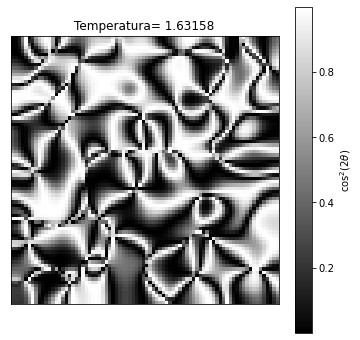

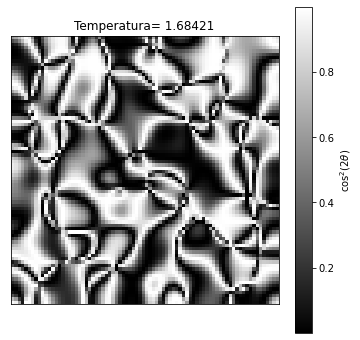

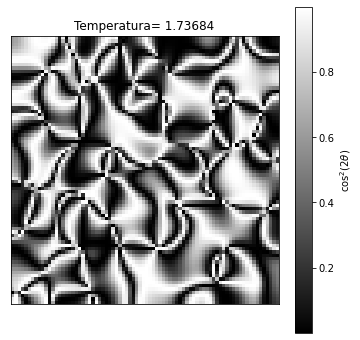

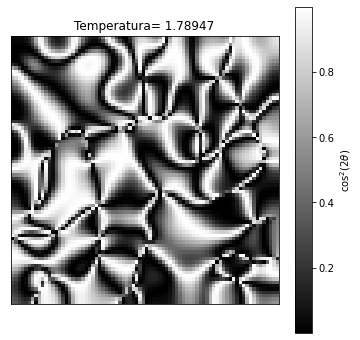

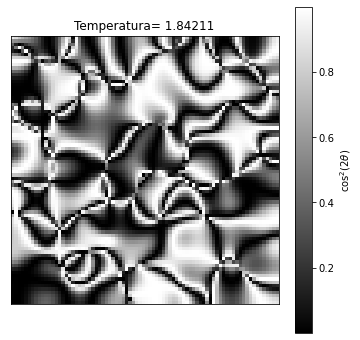

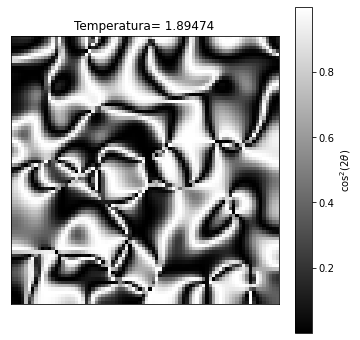

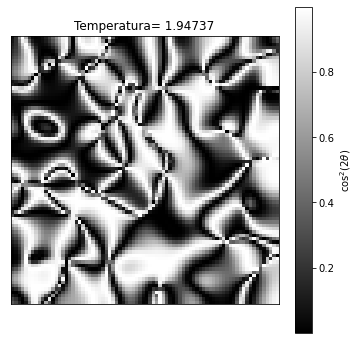

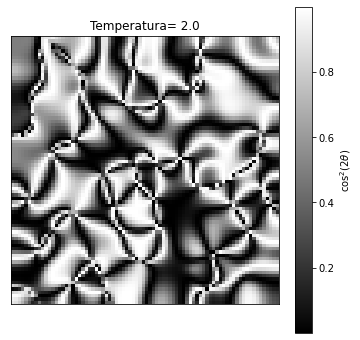

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter
import os

# Funciones para cargar los datos de las configuraciones
def load_and_normalize_config(file_path):
    config = np.loadtxt(file_path)
    config = np.mod(config, 2 * np.pi)
    return config


def load_configurations(directory, temperatures):
    configs = {}
    for temp in temperatures:
        temp_str = str(int(temp * 10000)).zfill(5)
        filename = os.path.join(directory, f'configatT={temp_str}.data')
        configs[temp] = load_and_normalize_config(filename)
    return configs

# Interpolación de la configuración con filtro gaussiano para una mejor visualización
def interpolate_config(config, L, sigma=4.0):
    config_x = np.cos(config)
    config_y = np.sin(config)
    smooth_x = gaussian_filter(config_x, sigma=sigma)
    smooth_y = gaussian_filter(config_y, sigma=sigma)
    smooth_config = np.arctan2(smooth_y, smooth_x)
    return smooth_config

# Función para calcular la cantidad a representar
def calculate_cos2_2theta(config):
    return np.cos(2 * config) ** 2

# Plot con mapa de calor en escala de grises
def plot_cos2_2theta_configurations(configs, temperatures, L):
    for temp in temperatures:
        config = configs[temp].reshape(L, L)
        smoothed_config = interpolate_config(config, L)
        cos2_2theta = calculate_cos2_2theta(smoothed_config)

        plt.figure(figsize=(6, 6))
        plt.imshow(cos2_2theta, cmap='gray', origin='lower')
        plt.colorbar(label=r'$\cos^2(2\theta)$')
        plt.title(f'Temperatura= {temp}')
        plt.xticks([])
        plt.yticks([])
        plt.savefig(f'cos2_2theta_temp_{int(temp*10000)}.pdf')
        plt.show()


def load_temperatures(file_path):
    data = np.loadtxt(file_path)
    return data  

# Función principal en el notebook
def main():
   
    temp_file_path = 'C:\\Users\\Usuario\\OneDrive\\Escritorio\\Cosas TFG\\transicionL=80\\variables.data'  # Cambiar esta ruta según sea necesario
    temperatures = load_temperatures(temp_file_path)
    L = 80             #Longitud de la red de espines

    #Directorioe en el que se encuentran los datos de la configuración
    dir1 = 'C:\\Users\\Usuario\\OneDrive\\Escritorio\\Cosas TFG\\transicionL=80'

    configs = load_configurations(dir1, temperatures)

    plot_cos2_2theta_configurations(configs, temperatures, L)


main()


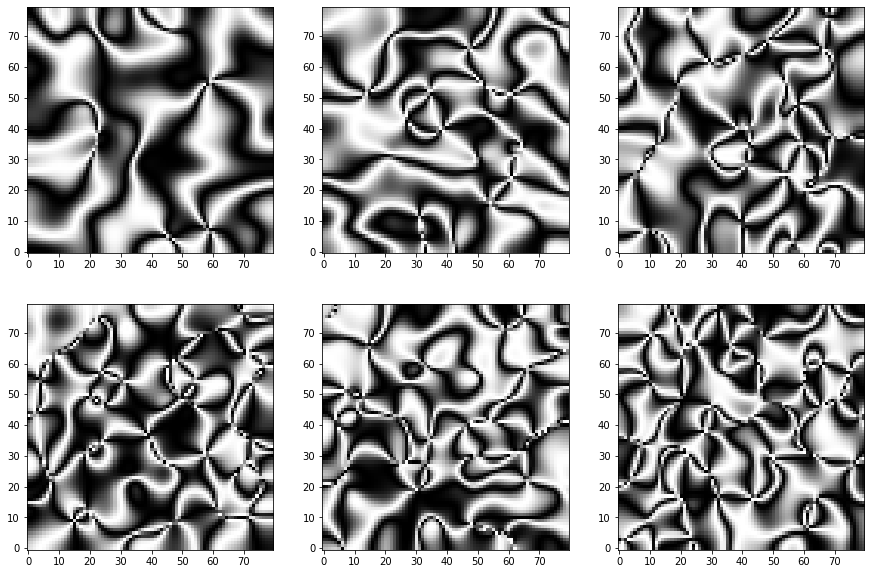

In [15]:
temp_file_path = 'C:\\Users\\Usuario\\OneDrive\\Escritorio\\Cosas TFG\\transicionL=80\\variables.data'  # Cambia esta ruta según sea necesario

#Temperaturas deseadas para representar
temperatures = np.array([1.05263, 1.15789, 1.26316, 1.36842, 1.47368, 1.73684])
L = 80

dir1 = 'C:\\Users\\Usuario\\OneDrive\\Escritorio\\Cosas TFG\\transicionL=80'

configs = load_configurations(dir1, temperatures)

fig, axes=plt.subplots(2,3,figsize=(15,10))

#Representación de distintas temperaturas en una misma figura tal como aparece en el anexo del trabajo
for i,temp in enumerate(temperatures):
    config = configs[temp].reshape(L, L)
    smoothed_config = interpolate_config(config, L)
    cos2_2theta = calculate_cos2_2theta(smoothed_config)
    
    x=i // 3
    y=i % 3
    
    ax=axes[x,y]
    
    ax.imshow(cos2_2theta, cmap='gray', origin='lower')
    
plt.savefig('cristalesliquidos.pdf')
    

    
    

In [7]:
4//4

1